## Instruções de execução:

Primeiro execute todas as células, uma unidade de teste será exutada junto.
Para calcular e imprimir o potencial e campo elétrico, basta utilizar o método printElectric(). A sintaxe é:

printElectric(res)

res - type: integer
Resolution of the grid. If the resolution is odd, it will be rounded to the closest even integer.

In [ ]:
''' x, numIter = conjGrad(Av,x,b,tol=1.0e-9)
Conjugate gradient method for solving [A] { x } = { b } .
The matrix [A] should be sparse. User must supply
the function Av(v) that returns the vector [A] { v } .
'''
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

def conjGrad(a,x,b,tol=1.0e-9):
    def Av(x):
        return np.dot(a, x)
    n = len(b)
    r = b - Av(x)
    s = r.copy()
    for i in range(n):
        u = Av(s)
        alpha = (1.0*np.dot(s,r))/np.dot(s,u)
        x = x + alpha*s
        r = b - Av(x)
        if(sqrt(np.dot(r,r))) < tol:
            break
        else:
            beta = -np.dot(r,u)/np.dot(s,u)
            s = r + beta*s
    return x,i

In [3]:
def generateMatrix(size = 5):
    potential = 100
    h = 1.0/(2*size - 1)
    pointMatrix = []
    
    for i in range(0, size):
        for j in range(0, size):
            y = h * i
            x = h * j
            if not (x == 0 or y == 0 or (x >= 1.0/3 and y >= 1.0/3)):
                pointMatrix.append([j, i])
    #print pointMatrix
    
    silkMatrix = []
    for i in range(0, 2*size):
        silkMatrix.append([])
        for j in range(0, 2*size):
            y = h * i
            x = h * j
            if x >= 1.0/3 and y >= 1.0/3 and x <= 2.0/3 and y<= 2.0/3:
                silkMatrix[i].append(potential)
            elif i == 0 or j == 0 or i == 2*size - 1 or j == 2*size - 1:
                silkMatrix[i].append(0)
            else:
                silkMatrix[i].append(-1)
    for point in pointMatrix:
        silkMatrix[point[0]][point[1]] = 2
    
    #for line in silkMatrix:
        #print line
        
    finalMatrix = []
    finalMatrix2 = [0]*len(pointMatrix)
        
    for i in range(0, len(pointMatrix)):
        finalMatrix.append([])
        for j in range(0, len(pointMatrix)):
            finalMatrix[i].append(0)
    
    for i in pointMatrix:
        x = i[0]
        y = i[1]
        finalMatrix[pointMatrix.index(i)][pointMatrix.index(i)] = -4
        points = [[x + 1, y], [x - 1, y], [x, y + 1], [x, y - 1]]
        for j in points:
            if silkMatrix[j[0]][j[1]] == 2:
                finalMatrix[pointMatrix.index(i)][pointMatrix.index(j)] += 1
            if silkMatrix[j[0]][j[1]] == potential:
                finalMatrix2[pointMatrix.index(i)] -= potential
            if silkMatrix[j[0]][j[1]] == -1:
                finalMatrix[pointMatrix.index(i)][pointMatrix.index(i)] += 1
            
    #for line in finalMatrix:
        #print line
        
    #print finalMatrix2
    #print conjGrad(finalMatrix, [0]*len(pointMatrix), finalMatrix2)
    
    answer = conjGrad(finalMatrix, [0]*len(pointMatrix), finalMatrix2)[0]
    
    for i in range(0, len(answer)):
        point = pointMatrix[i]
        silkMatrix[point[0]][point[1]] = answer[i]
    #for line in silkMatrix:
        #print line
        
    #copy the 1/4 of the matrix to a temporary one for pasting
    tmpMatrix = []
    for i in range(0, len(silkMatrix)/2):
        tmpMatrix.append([])
        for j in  range(0, len(silkMatrix)/2):
            tmpMatrix[i].append(silkMatrix[i][j])
    #print
    #rotates the list, but i got no idea how it works
    tmpMatrix = zip(*tmpMatrix[::-1])
    
    #for line in tmpMatrix:
        #print line
    
    offsetList = [[0, len(silkMatrix)/2], [len(silkMatrix)/2, len(silkMatrix)/2], [len(silkMatrix)/2, 0]]
    
    for offsets in offsetList:
        offLine = offsets[0]
        offColu = offsets[1]
        for i in range(0, len(silkMatrix)/2):
            for j in range(0, len(silkMatrix)/2):
                silkMatrix[i + offLine][j + offColu] = tmpMatrix[i][j]
        tmpMatrix = zip(*tmpMatrix[::-1])
    
    #print
    #for line in silkMatrix:
        #print line
    
    p1 = plt.figure(num=None, figsize=(12, 9), dpi=160, facecolor='w', edgecolor='k')
    plt.imshow(silkMatrix, cmap=plt.cm.RdYlBu)
    plt.title("Heatmap do potencial eletrico")
    plt.colorbar()
    plt.show(p1)
    
    #generate vector field
    U = []
    V = []
    UN = []
    VN = []
    speed = []
    for i in range(0, len(silkMatrix)):
        for j in range(0, len(silkMatrix)):
            U.append(i)
            V.append(j)
            if(i == 0 or j == 0 or i == len(silkMatrix) - 1 or j == len(silkMatrix) - 1):
                UN.append(0)
                VN.append(0)
                speed.append(0)
            else:
                UN.append(i + ((silkMatrix[i - 1][j] - silkMatrix[i + 1][j])/(2*h)))
                VN.append(j + ((silkMatrix[i][j - 1] - silkMatrix[i][j + 1])/(2*h)))
                speed.append(sqrt(((silkMatrix[i - 1][j] - silkMatrix[i + 1][j])/(2*h))**2 + ((silkMatrix[i][j - 1] - silkMatrix[i][j + 1])/(2*h)) ** 2))
    
    p = plt.figure(num=None, figsize=(12, 9), dpi=160, facecolor='w', edgecolor='k')
    plt.quiver(U, V, UN, VN, speed, cmap=cm.hot, headlength=7)       
    plt.colorbar()                  # adds the colour bar

    plt.title('Campo vetorial do campo eletrico')
    plt.show(p)                 # display the plot

In [4]:
def printElectric(size = 10):
    generateMatrix(size/2)

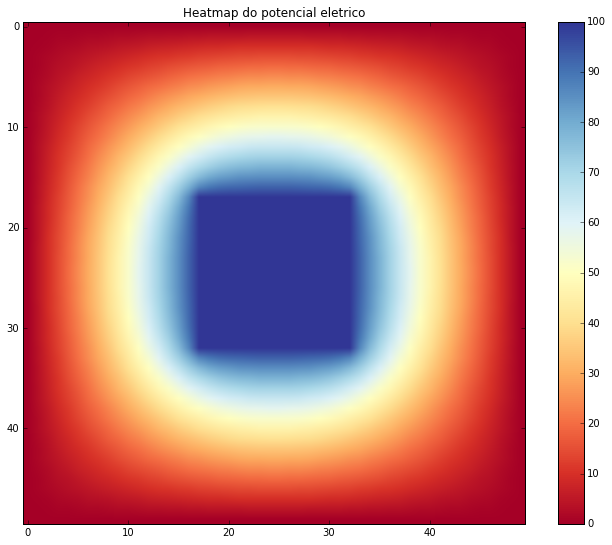

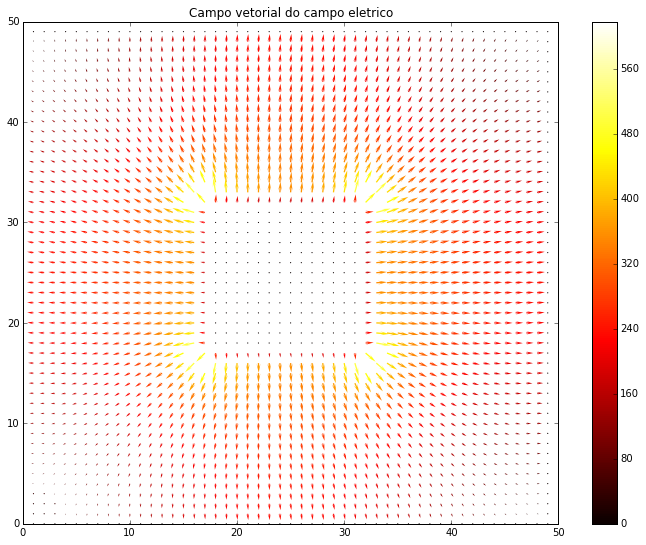

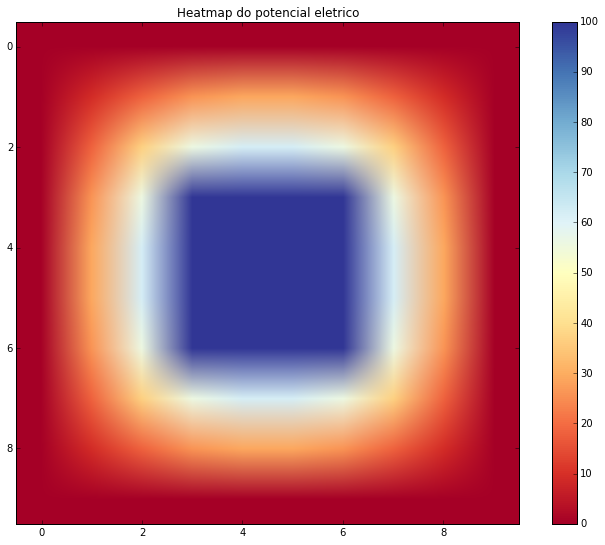

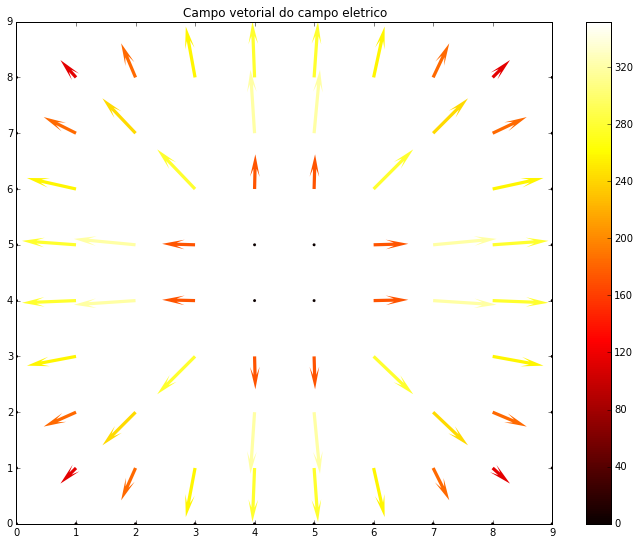

In [5]:
#printElectric(50)
printElectric(10)